In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

csv_file = '/content/drive/My Drive/TFG_AlienEmbarecRiadi/data_numeric_normalized.csv'
data = pd.read_csv(csv_file, delimiter=',')

print(data)

        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent  days_in_waiting_list  customer_type     adr  required_car_parking_spaces  total_of_special_requests  reservation_status  total_stayed_nights  weekend_nights_proportion  reservation_status_year  reservation_status_month  reservation_status_day
0           1            0        342               2015                   7                        27                          1                        0                     0       2         0       0     1               0                     0                  0                       0                               0                   2               

In [2]:
data['all_children'] = data['children'] + data['babies']
data = data.drop('children', 1)
data = data.drop('babies', 1)

In [3]:

# eliminando adr > 400
indexNames = data[ data['adr'] > 300 ].index


print('indexNames ', indexNames)
data.drop(indexNames , inplace=True)
data.dropna(axis=0, inplace=True)

# eliminando adr <= 0
indexNames = data[ data['adr'] <= 0 ].index

print('indexNames ', indexNames)
data.drop(indexNames , inplace=True)
data.dropna(axis=0, inplace=True)



indexNames = data[ data['adults'] >= 6 ].index


data.drop(indexNames , inplace=True)
data.dropna(axis=0, inplace=True)

'''
one_hot = pd.get_dummies(data['adults'], prefix='adults')

data = data.drop('adults', 1)

data = data.join(one_hot)
'''
# copiar dataset original
dataCopy = data.copy()




variable_objetivo = dataCopy.pop('adr')
# dataCopy = dataCopy.drop('agent', 1)

print(dataCopy.shape)
print(dataCopy.columns)


indexNames  Int64Index([  3712,   7419,   7543,   7606,   7673,   7676,   7718,   7793,   9727,   9728,
            ...
            114535, 114581, 115541, 116150, 116394, 117125, 117792, 118241, 118252, 118515], dtype='int64', length=276)
indexNames  Int64Index([     0,      1,    125,    167,    168,    196,    197,    421,    428,    459,
            ...
            117701, 117901, 117960, 118029, 118142, 118631, 118762, 118963, 119102, 119124], dtype='int64', length=1960)
(117154, 32)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_

In [4]:
X = dataCopy.copy()
y = variable_objetivo.copy()

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


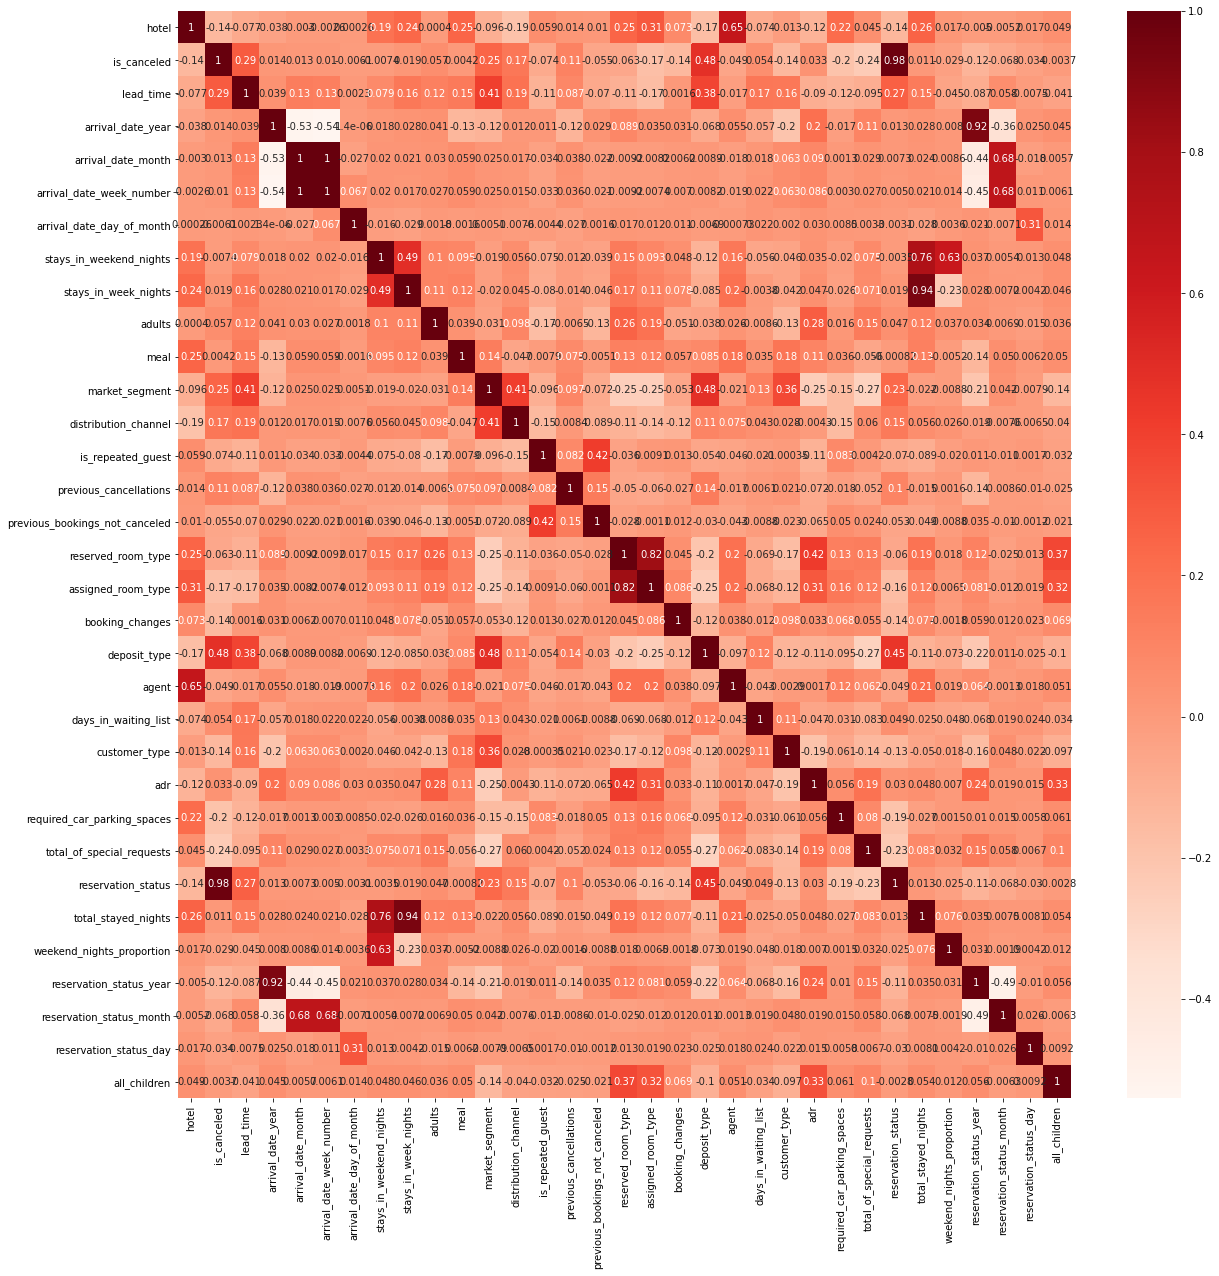

In [36]:

plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [6]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
print(y.shape)
print(X_1.shape)
#Fitting sm.OLS model
model = sm.OLS(list(y),X_1.astype(float)).fit()
model.pvalues

(117154,)
(117154, 33)


const                              0.000000e+00
hotel                              0.000000e+00
is_canceled                        2.023008e-31
lead_time                          0.000000e+00
arrival_date_year                  2.165039e-50
arrival_date_month                7.016889e-174
arrival_date_week_number          2.564632e-134
arrival_date_day_of_month         1.923536e-159
stays_in_weekend_nights            4.057832e-22
stays_in_week_nights               7.111179e-22
adults                             0.000000e+00
meal                               0.000000e+00
market_segment                     0.000000e+00
distribution_channel               4.764855e-12
is_repeated_guest                  1.914425e-79
previous_cancellations             8.262719e-11
previous_bookings_not_canceled     7.732524e-20
reserved_room_type                 0.000000e+00
assigned_room_type                 4.364766e-34
booking_changes                    6.618024e-21
deposit_type                       6.751

In [7]:

cols = list(X.columns)
pmax = 1 
while (len(cols)>0):
    p= []
    X_1 = X[cols] # 
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(list(y),X_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'total_stayed_nights', 'weekend_nights_proportion', 'reservation_status_year', 'reservation_status_month', 'reservation_status_day', 'all_children']


In [8]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False False False False False  True  True False
 False  True False False False False False False False False False  True
 False False False False  True False False  True]
[ 1  4 22  3  8 15 16 11 21  1  1  7 10  1 12 19  2 14 13 17 25 26  9  1
  6  5 20 23  1 18 24  1]


In [9]:
#no of features
nof_list=np.arange(1,50)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 32
Score with 32 features: 0.437533


In [10]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['hotel', 'is_canceled', 'arrival_date_year', 'adults', 'meal', 'is_repeated_guest', 'reserved_room_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_year', 'all_children'], dtype='object')


In [11]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141316.84984131157, tolerance: 21052.685010818564
  tol, rng, random, positive)


Best alpha using built-in LassoCV: 0.435448
Best score using built-in LassoCV: 0.422050


In [12]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 25 variables and eliminated the other 7 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

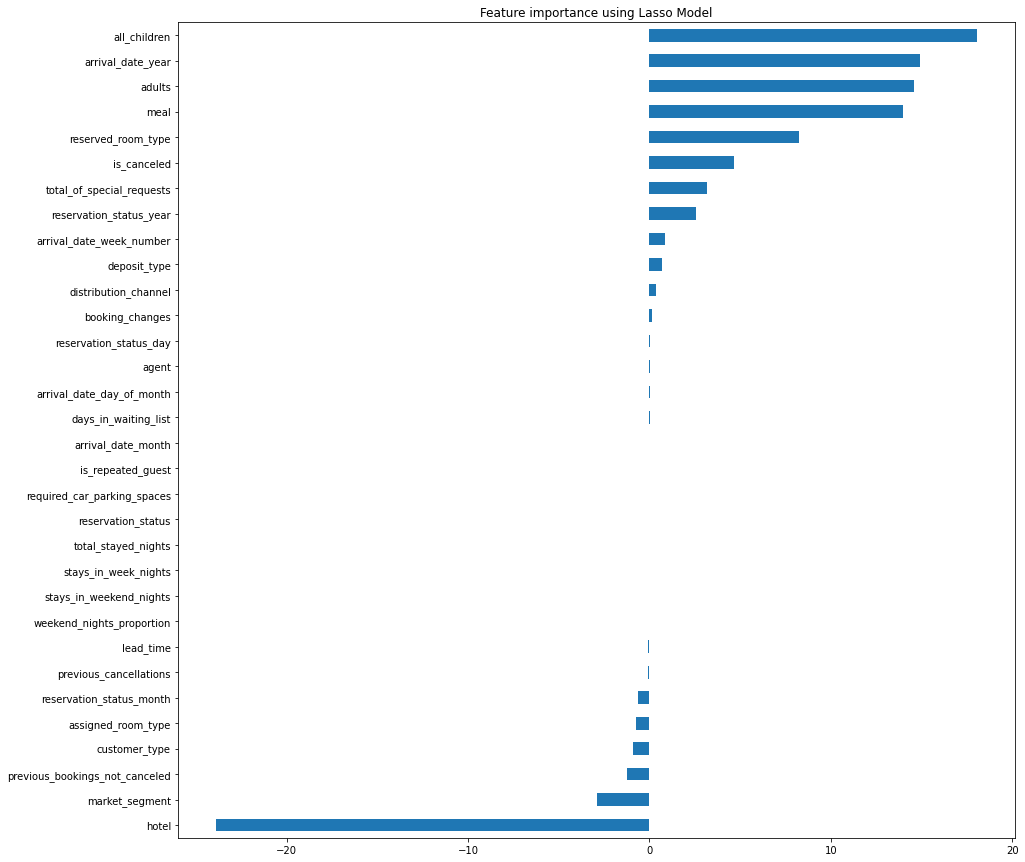

In [13]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [14]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X = dataCopy[['all_children']]
print(X.shape)
y = variable_objetivo

print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(117154, 1)
(117154,)
(82007, 1) (82007,)
(35147, 1) (35147,)


(82007, 1)
(82007,)
Cross-validated scores: [0.0471296  0.00798061]


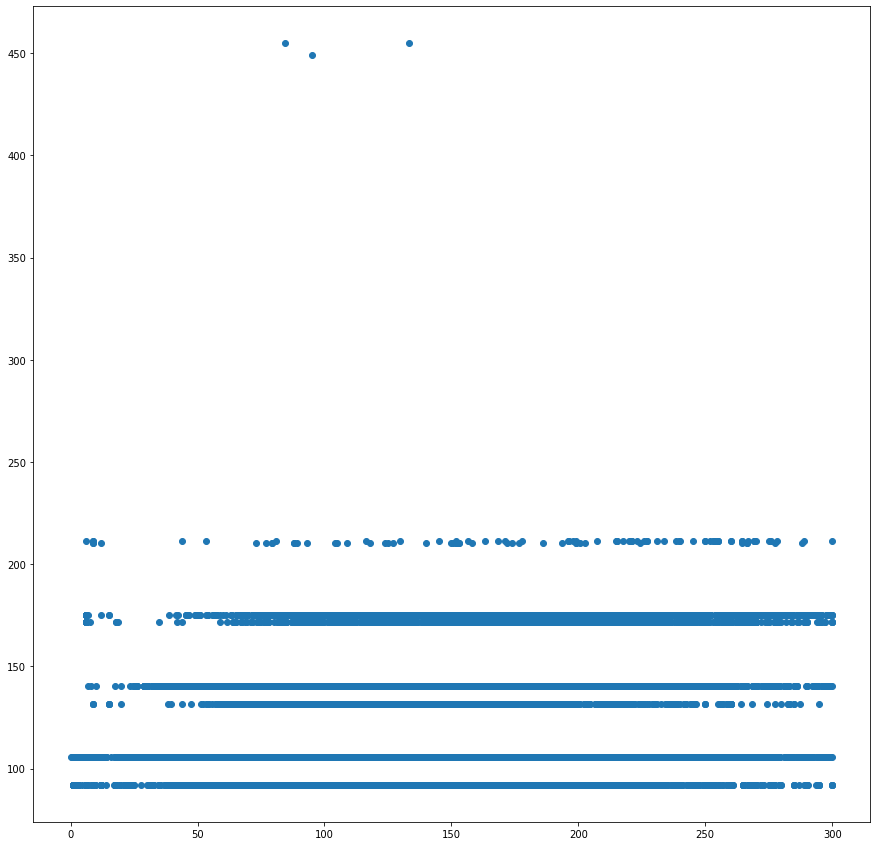

In [15]:
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn import metrics
# fit a model
lm = linear_model.LinearRegression()

print(X_train.shape)
print(y_train.shape)
model = lm.fit(X_train, y_train)

# Perform 6-fold cross validation


scores = cross_val_score(model, X, y, cv=2)
print ('Cross-validated scores:', scores)

# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=2)
plt.scatter(y, predictions)

In [16]:
accuracy = metrics.r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.05035029730057938


In [17]:
lm = LinearRegression()
# df.drop(['C', 'D'], axis = 1)
X = dataCopy[['hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'adults', 'meal', 'agent', 'reserved_room_type', 'all_children']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model = lm.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)

(87865, 9)
(29289, 9)


In [18]:
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn import metrics
# Perform 6-fold cross validation


scores = cross_val_score(model, X, y, cv=4)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.23700968 0.31622559 0.3809832  0.4040132 ]


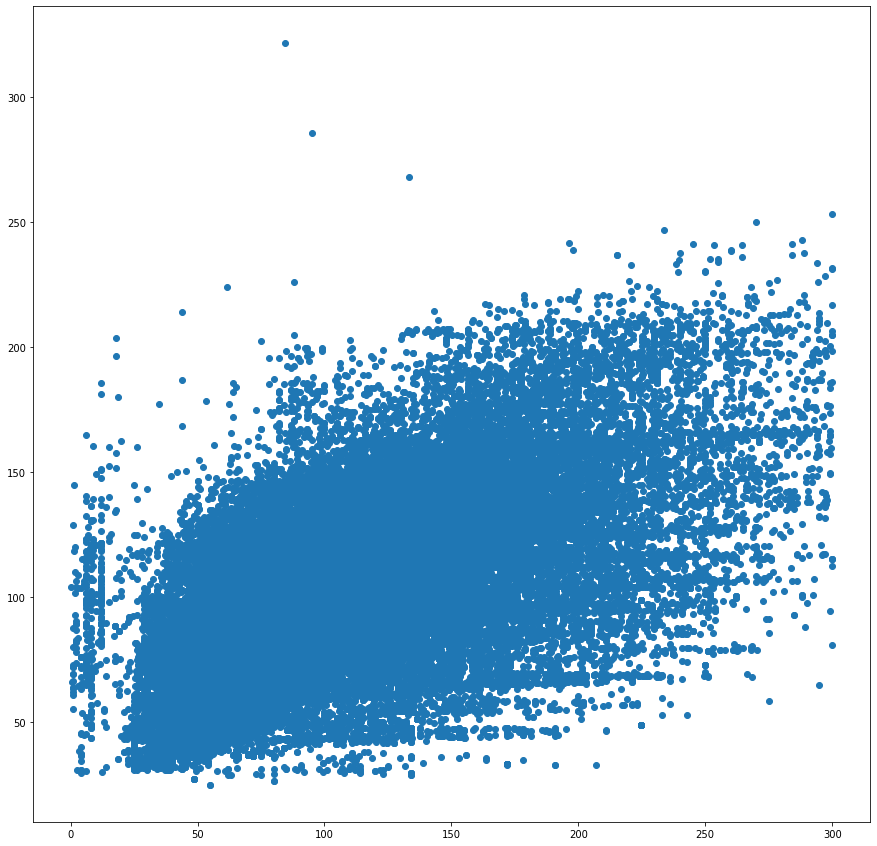

In [19]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=4)
plt.scatter(y, predictions)

In [20]:
accuracy = metrics.r2_score(y, predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.3316767560297462


In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=9)
knn_model = knn.fit(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(87865, 9)
(87865,)


In [22]:
scores = cross_val_score(knn_model, X, y, cv=4)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.51032672 0.65971857 0.5627369  0.52691147]


Text(0, 0.5, 'Predictions')

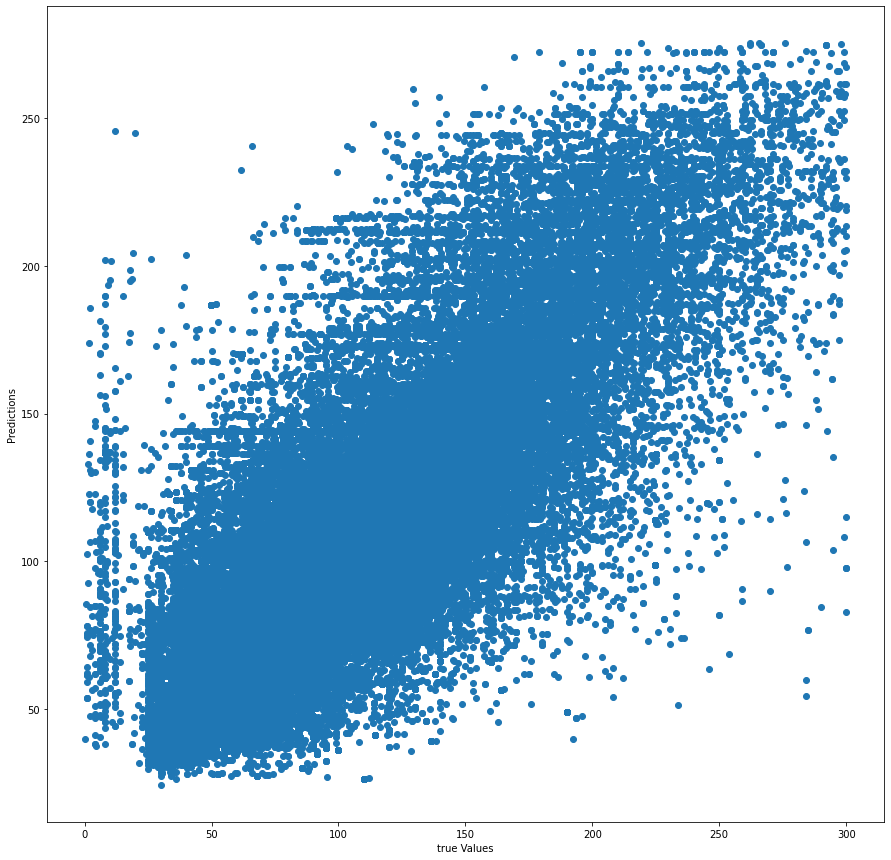

In [23]:
knn_predictions = cross_val_predict(knn_model, X, y, cv=4)
plt.scatter(y, knn_predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

In [24]:
accuracy = metrics.r2_score(y, knn_predictions)
print ('Cross-Predicted Accuracy:', accuracy)

Cross-Predicted Accuracy: 0.5714717896932495


Cross-validated scores: [0.27945701 0.36552364 0.26898665 0.23086877 0.30080778 0.41794588
 0.31666355 0.32074323 0.4489266 ]
36.36380239845443
0.35918202048674175


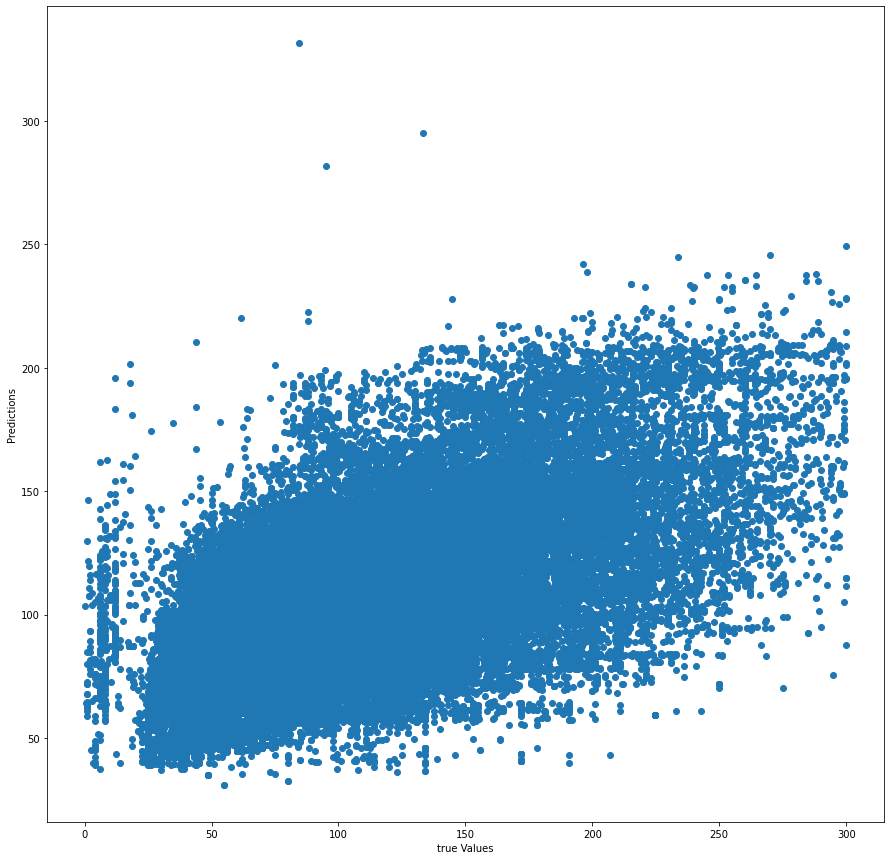

In [25]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)


scores = cross_val_score(model, X, y, cv=9)
print ('Cross-validated scores:', scores)

y_poly_pred = cross_val_predict(model, X, y, cv=9)

plt.scatter(y, y_poly_pred)
plt.xlabel('true Values')
plt.ylabel('Predictions')


rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = metrics.r2_score(y,y_poly_pred)
print(rmse)
print(r2)

Cross-validated scores: [0.33342869 0.26437866 0.34818632 0.41427076 0.40974593]
36.22041446747856
0.36422573972841765


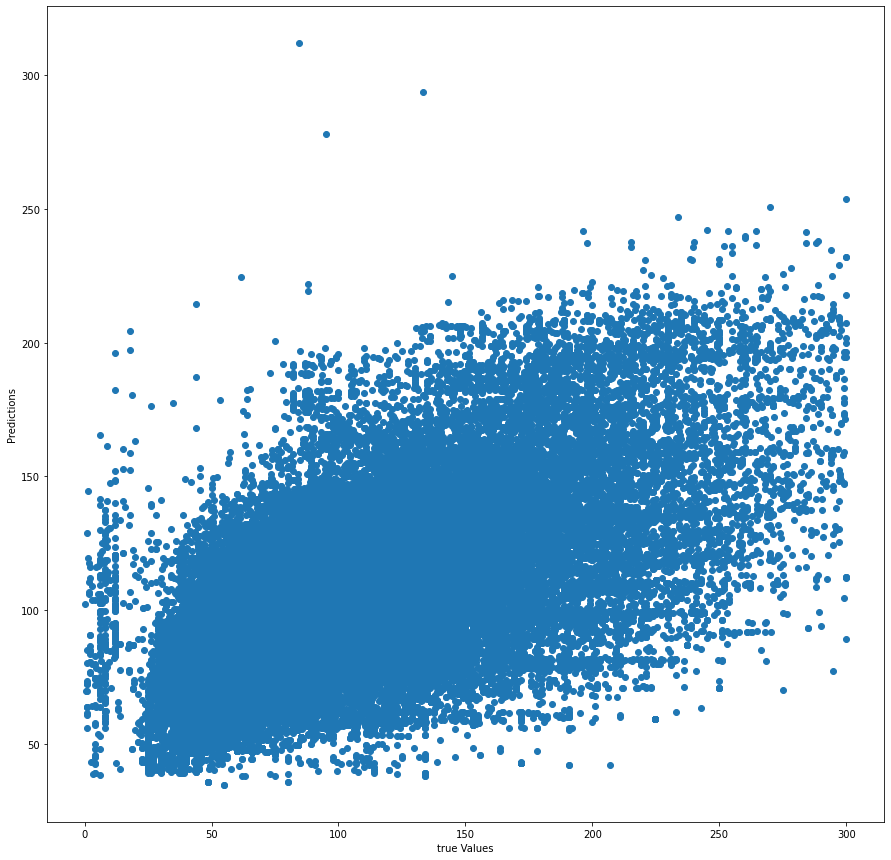

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X,y)

scores = cross_val_score(ridge, X, y, cv=5)
print ('Cross-validated scores:', scores)


ridge_predictions = cross_val_predict(ridge, X, y, cv=5)
plt.scatter(y, ridge_predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

rmse = np.sqrt(mean_squared_error(y, ridge_predictions))
r2 = metrics.r2_score(y,ridge_predictions)
print(rmse)
print(r2)

Cross-validated scores: [0.30501984 0.25293696 0.21760178 0.40532763 0.44619272 0.20369626
 0.30369935 0.45599565]
36.77249861981126
0.3446966461167712


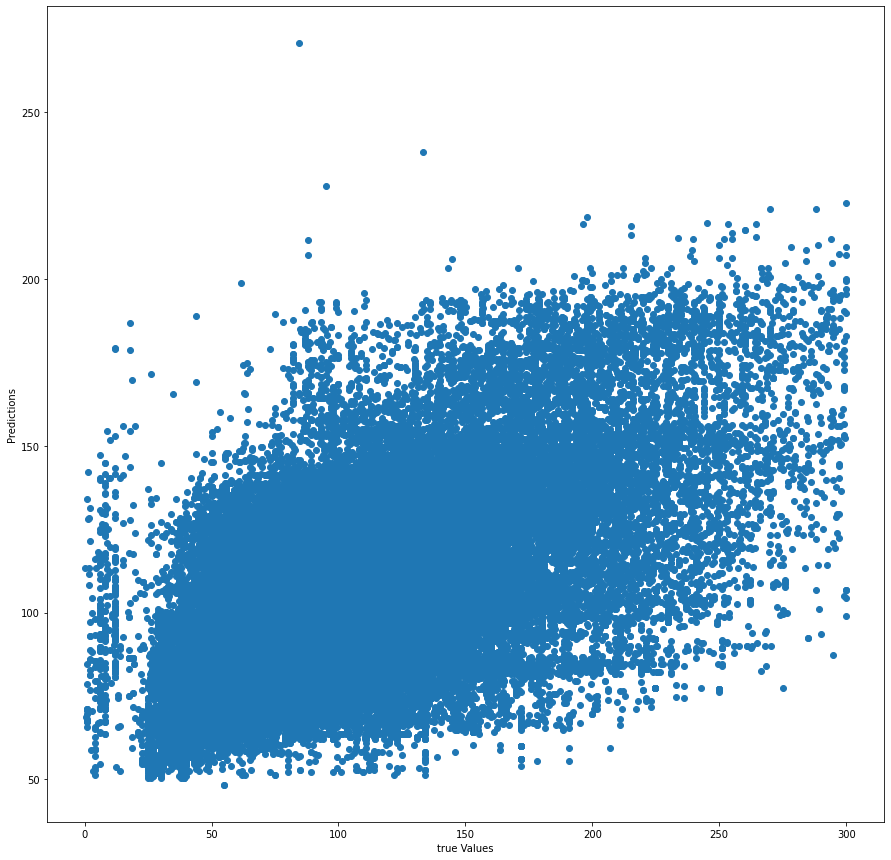

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X,y)

scores = cross_val_score(lasso, X, y, cv=8)
print ('Cross-validated scores:', scores)


lasso_predictions = cross_val_predict(lasso, X, y, cv=8)
plt.scatter(y, lasso_predictions)
plt.xlabel('true Values')
plt.ylabel('Predictions')

rmse = np.sqrt(mean_squared_error(y, lasso_predictions))
r2 = metrics.r2_score(y, lasso_predictions)
print(rmse)
print(r2)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
elastic=ElasticNet(normalize=False)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [30]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(X,y)   
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.38, MSE:1288.18, RMSE:35.89
Alpha:0.0010, R2:0.38, MSE:1288.18, RMSE:35.89
Alpha:0.0100, R2:0.38, MSE:1288.47, RMSE:35.90
Alpha:0.1000, R2:0.37, MSE:1305.79, RMSE:36.14
Alpha:0.3000, R2:0.34, MSE:1362.21, RMSE:36.91
Alpha:0.5000, R2:0.32, MSE:1409.84, RMSE:37.55
Alpha:0.7000, R2:0.30, MSE:1447.65, RMSE:38.05
Alpha:1.0000, R2:0.28, MSE:1491.73, RMSE:38.62


In [31]:
elastic=ElasticNet(alpha=0.01).fit(X_train, y_train)
ypred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mse = mean_squared_error(y_test, ypred)

print(ypred)
print(score)
print(mse)

[105.81846537  83.89985613 190.49683686 ...  98.47103559 108.0840603
  85.48432816]
0.3784979909345867
1266.6293551280676


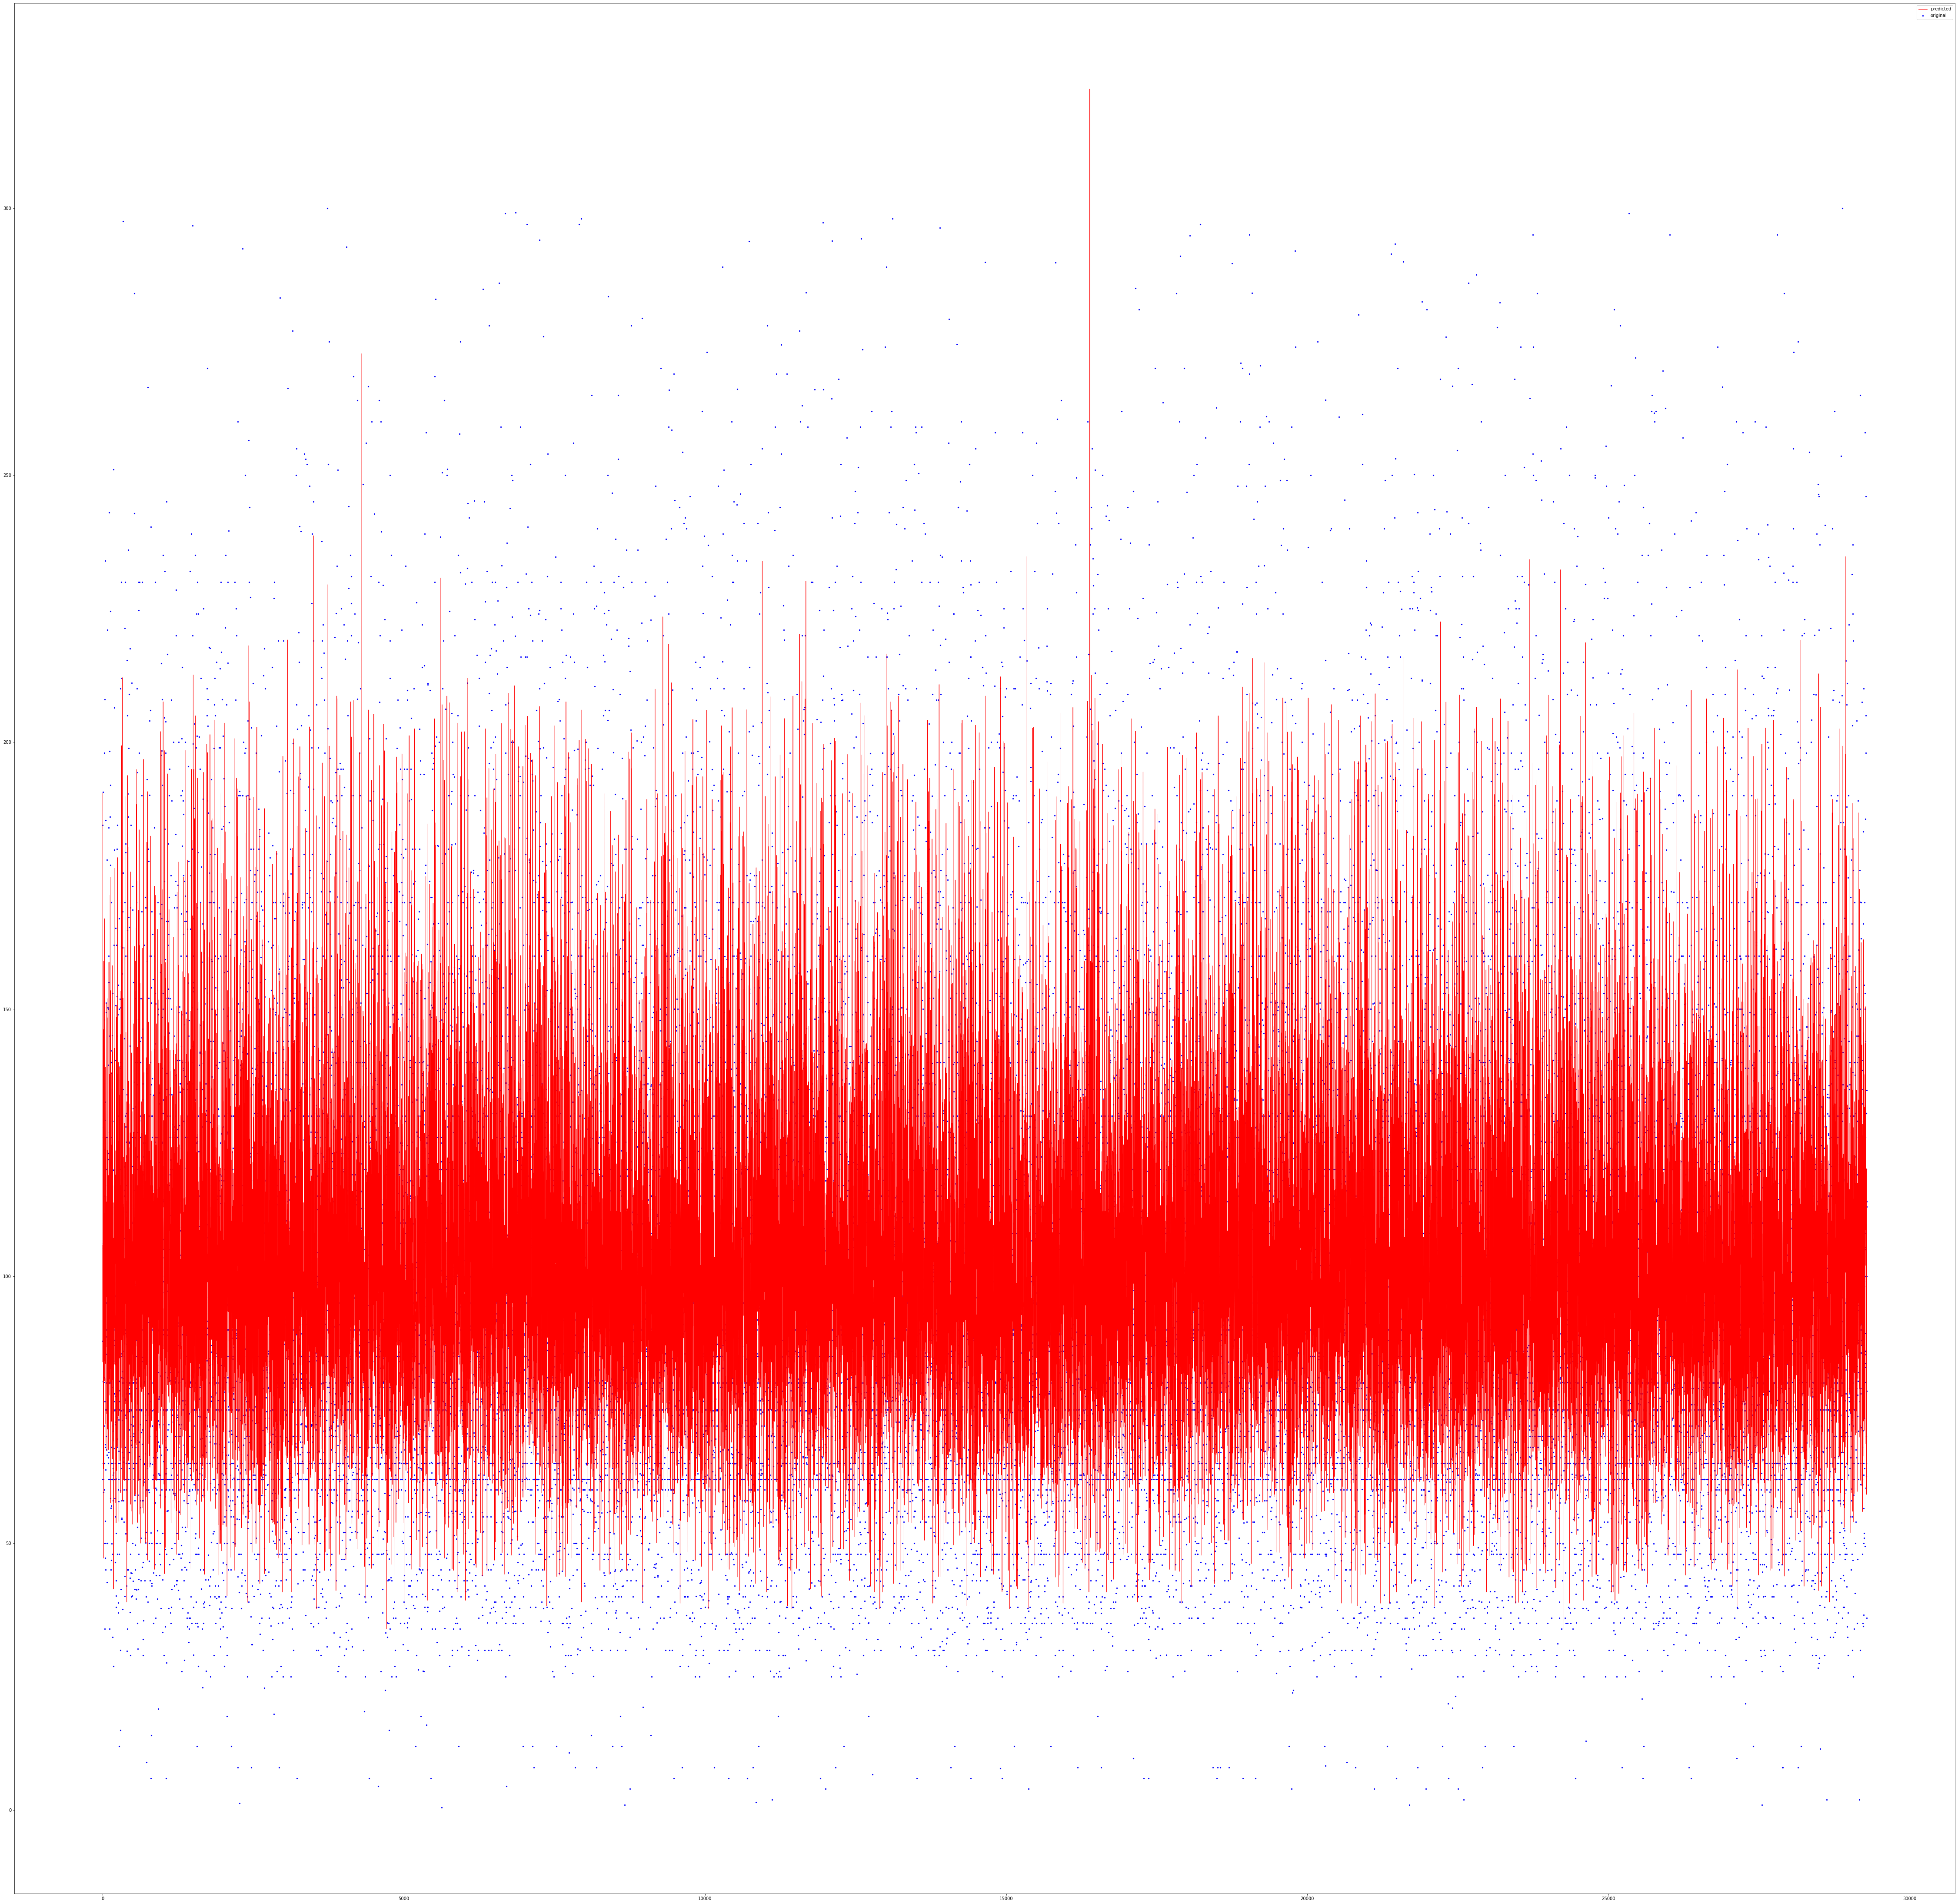

In [32]:

x_ax = range(len(X_test))
plt.figure(figsize=(80,80))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()